<a href="https://colab.research.google.com/github/techno-jules/ShoethenticAIWebApp/blob/main/Shoe_Authenticity_Detector_Sire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


created by Julia Huang

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob
path = '/content/drive/MyDrive/shoedataset'
#processing images
real_path = path+ '/Real/*.png'
fake_path = path+ '/Fake/*.png'


#all images are 227x227 in RGB so 227, 227, 3
real_images = [cv2.imread(image) for image in glob.glob(real_path)]
fake_images = [cv2.imread(image) for image in glob.glob(fake_path)]




In [ ]:
real_images

[]

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "training",
    seed = 24,
    image_size = (227, 227),
    batch_size = 64
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "validation",
    seed = 24,
    image_size = (227, 227),
    batch_size = 64
)

train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)



Found 121 files belonging to 2 classes.
Using 97 files for training.
Found 121 files belonging to 2 classes.
Using 24 files for validation.


In [ ]:
'''
model = Sequential ([
    layers.Rescaling(1./255, input_shape = (227, 227, 3)),
    #layers.RandomFlip("horizontal_and_vertical"),
    #layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(2)
])
'''
'''
model = Sequential ([
layers.Conv2D(16, (3, 3), activation='relu', input_shape=(227, 227, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(16, (3, 3), padding = 'same',activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='softmax'),
layers.Dense(2)
])

'''
'''
model = Sequential( # MODEL SO FAR- 60% ACC
    [
    layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(227, 227, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(2, activation="softmax")
])
'''
'''
model = Sequential(  # best MODEL SO FAR- 80% ACC with image size 227
    [
    layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(227, 227, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(2, activation="sigmoid")
])
'''


model = Sequential(  # best MODEL SO FAR- 75% ACC
    [
      layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(227, 227, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(2, activation="sigmoid")
])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 227, 227, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 113, 113, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 113, 113, 64)      18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 200704)            0         
                                                                 
 dense_40 (Dense)            (None, 100)             

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

model.fit (
    train_dataset,
    validation_data = val_dataset,
    epochs = 240
)
model.save('model.h5')

Epoch 1/240


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



4/4 [==============================] - 3s 292ms/step - loss: 1.3434 - accuracy: 0.6082 - val_loss: 195.6565 - val_accuracy: 0.5417
Epoch 2/240
4/4 [==============================] - 0s 42ms/step - loss: 0.7179 - accuracy: 0.7835 - val_loss: 29.3370 - val_accuracy: 0.5417
Epoch 3/240
4/4 [==============================] - 0s 42ms/step - loss: 0.3336 - accuracy: 0.8866 - val_loss: 13.7411 - val_accuracy: 0.5417
Epoch 4/240
4/4 [==============================] - 0s 44ms/step - loss: 0.3132 - accuracy: 0.8557 - val_loss: 4.1176 - val_accuracy: 0.4583
Epoch 5/240
4/4 [==============================] - 0s 44ms/step - loss: 0.2036 - accuracy: 0.9588 - val_loss: 6.9485 - val_accuracy: 0.5417
Epoch 6/240
4/4 [==============================] - 0s 42ms/step - loss: 0.1205 - accuracy: 1.0000 - val_loss: 5.8225 - val_accuracy: 0.5417
Epoch 7/240
4/4 [==============================] - 0s 46ms/step - loss: 0.0818 - accuracy: 1.0000 - val_loss: 84.0891 - val_accuracy: 0.5417
Epoch 8/240
4/4 [=========

Text(0.5, 1.0, 'Training-Validation Accuracy')

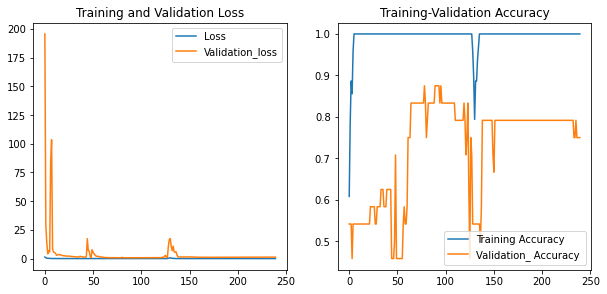

In [ ]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

1/1 - 0s - loss: 1.2781 - accuracy: 0.7500 - 20ms/epoch - 20ms/step


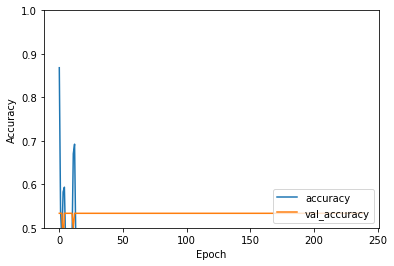

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val_dataset, verbose=2)

In [ ]:

print(test_acc)

0.75


In [ ]:
dsfdsf

NameError: ignored

#streamlit

In [ ]:
! pip install -q streamlit

In [ ]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

In [ ]:
!/ngrok authtoken 2Fud0KVvq9S56Na5IbL6NRnHZtZ_6KvuGdz8px9MHULrMeHWf

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
#Publish Web App (Run this again whenever you make changes)
public_url = ngrok.connect(port='80')
print (public_url)
! streamlit run --server.port 80 app.py

In [ ]:
import tensorflow as tf

# ====== Save model ========
model.save("model.h5")

# ====== Load model ========
tf.keras.models.load_model("model.h5")

In [ ]:
model = tf.keras.models.load_model("model.h5")

In [ ]:
model.summary()

In [ ]:
model.input_shape

In [ ]:
import cv2
import streamlit as st
import numpy as np
f = st.file_uploader("Upload Image")

In [ ]:
!streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

In [ ]:
if f is not None:
  file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
  image = cv2.imdecode(file_bytes, 1)
  st.image(image, channels="BGR")

In [ ]:
scsd

In [ ]:
with open("/content/drive/MyDrive/shoedataset/Fake/IMG_9368.PNG", "rb") as f:
  file_bytes = np.asarray(bytearray(f.read()))
  image = cv2.imdecode(file_bytes, 1)
import plotly.express as px
print("Shape of image:")
print(image.shape)
print(f"Maximum value in the image: ")
print(image.max())
print("Minimum value in the image:")
print(image.min())

# Here we convert to RGB because our plotting function takes in RGB images
px.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
resized = cv2.resize(image, (227, 227), interpolation=cv2.INTER_LANCZOS4)
print(resized.shape)
px.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

In [ ]:
gray_1d = np.mean(resized, axis=-1)
gray = np.zeros_like(resized)
gray[:,:,0] = gray_1d
gray[:,:,1] = gray_1d
gray[:,:,2] = gray_1d

In [ ]:
px.imshow(gray)

In [ ]:
normalized = gray/255
px.imshow(normalized)

In [ ]:
print("Shape of image:")
print(normalized.shape)
print(f"Maximum value in the image: ")
print(normalized.max())
print("Minimum value in the image:")
print(normalized.min())

In [ ]:
OPTIONS = ['Fake', 'Real']

In [ ]:
model_input = np.expand_dims(normalized,0)
scores = model.predict(model_input)
scores

In [ ]:
  df = pd.DataFrame()
  df["Options"] = OPTIONS
  df["Scores"] = scores.flatten()
  px.bar(df, x='Options', y='Scores', title="Model scores for each type")

In [ ]:
prediction = OPTIONS[scores.argmax()]
print(prediction)

#combined method

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [ ]:
!pip install st-btn-select

In [ ]:
#@title Run this cell to initialize your website!
%%writefile app.py
import streamlit as st
from joblib import load
import numpy as np
import cv2
from datetime import datetime
from keras.models import load_model
import streamlit as st
import numpy as np
import glob
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
import keras
from datetime import date
from st_btn_select import st_btn_select

selection = st_btn_select(('CHECK YOUR SHOES', 'ABOUT'))

if selection == 'CHECK YOUR SHOES':

    st.title("Shoethentic")
    st.header("Created by Julia Huang & Justin Huang")
    st.header("Detect if your shoes are fake or not via AI!")
    st.subheader("Quick and easy; you only need to upload images to receive an automatic result!")



    image = st.file_uploader(label = "Upload an image for analysis:", type = ['png', 'jpg', 'jpeg', 'tif', 'tiff', 'raw', 'webp'])

    def import_and_predict(image_data, model):
        size = (227, 227)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = tf.keras.utils.img_to_array(image)
        img = tf.expand_dims(img, 0)
        probs = model.predict(img)
        score = tf.nn.softmax(probs[0])
        text = ("Shoethentic predicts that this is an image of **{} shoe with {:.2f}% confidence**."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
        return text

    loaded_model = tf.keras.models.load_model('model.h5')
    class_names = ['Fake', 'Real']

    predictionText = "Prediction: Waiting for an image upload"

    if image is not None:
        st.image(image)
        predictionText = (import_and_predict(Image.open(image), loaded_model))

    st.markdown(predictionText)



if selection == 'ABOUT':
    st.title("About")

    st.subheader("About the Creator")
    st.markdown("Shoethentic's web app and model is built by Julia Huang, a current student and developer at Sire, and the dataset is created by Justin Huang.")

    st.subheader("Mission")
    st.markdown("Due to the high prevalence of counterfeit shoe production, the goal of **Shoethentic** is to provide the sneakerhead community an opportunity to check the authenticity of each and every shoe they buy. **Shoethentic** aims to make this checking process simpler and more convenient by utilizing AI & machine learning.")
    st.subheader("How Shoethentic was Built")

    st.markdown("Shoethentic has two parts: the AI model and web app. The AI model is built using the TensorFlow framework while the web app is built using Streamlit. We trained the model on a dataset consisting of fake and real shoe images sourced from the CheckCheck mobile app.")

    st.subheader("Future of Shoethentic")
    st.markdown("We plan to improve the accuracy of the AI model even more when checking for shoes and integrate it into the Sire website later on.")

In [ ]:
from pyngrok import ngrok
#Publish Web App (Run this again whenever you make changes)
public_url = ngrok.connect(port='80')
print (public_url)
! streamlit run --server.port 80 app.py

In [ ]:
!kill port='80'